<h1 style="background-color: gray;
           color: black;
           padding: 20px;
           text-align: center;">INFO</h1>

In this script, we compare players `Random1`, `Random2` , `Random3` and `Random4` in a game where there is only one cheese to catch in a maze without mud. \
All programs are evaluated on the same game configurations. \
We do not show the game interface here, to make the script faster. \
The goal is to compare the performances of the different random players in the same conditions.

<h1 style="background-color: gray;
           color: black;
           padding: 20px;
           text-align: center;">IMPORTS</h1>

In [1]:
# External imports
import sys
import os
import tqdm.auto as tqdm
import matplotlib.pyplot as plt
import scipy.stats as scstats
import statistics

# Add needed directories to the path
sys.path.append(os.path.join("..", "players"))

#List of all players
players_list = ["Greedy", "Exhaustive", "Backtracking"]

# PyRat imports
from pyrat import Game, GameMode
from Exhaustive import Exhaustive
from Greedy import Greedy

C:\Users\Corentin\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<h1 style="background-color: gray;
           color: black;
           padding: 20px;
           text-align: center;">CONSTANTS</h1>

In this script, we are going to make multiple independent games. \
The goal is to collect enough statistics to draw conclusions on which algorithm is better than the other. \
This constant defines how many games are made.

In [2]:
# Determines how many games will be played for each player
NB_GAMES = 100

Let's configure the game with a dictionary. \
Note that we put the game mode as `SIMULATION` to perform all games as fast as possible.

In [3]:
# Customize the game elements
CONFIG = {"mud_percentage": 20.0,
          "nb_cheese": 3,
          "maze_width": 8,
          "maze_height": 8,
          "game_mode": GameMode.SIMULATION}

<h1 style="background-color: gray;
           color: black;
           padding: 20px;
           text-align: center;">RUN THE GAMES</h1>

Let us now perform all games. \
For each game, we remember the number of turns needed to complete it.

In [4]:
nb_cheese_max = 9

# Players to test (keys are legends to appear in the plot)
players = {"Exhaustive": {"class": Exhaustive, "args": {}},
           "Greedy": {"class": Greedy, "args": {}}}


# Run the games for each player
prepro = {key: [ [] for _ in range(nb_cheese_max) ] for key in players}
turns = {key: [ [] for _ in range(nb_cheese_max)] for key in players}

for cheese in range(1, nb_cheese_max + 1):
    print(f"Number of cheese: {cheese}")
    # Update the number of cheese
    CONFIG["nb_cheese"] = cheese

    for key in players:
        for seed in tqdm.tqdm(range(NB_GAMES), desc=key):

            # Make the game with given seed
            game = Game(random_seed=seed, **CONFIG)
            player = players[key]["class"](**players[key]["args"])
            game.add_player(player)
            stats = game.start()

            # Store the number of turns needed and preprocessing time
            prepro[key][cheese-1].append(stats["players"][str(key)]["preprocessing_duration"])
            turns[key][cheese-1].append(stats["turns"])

Number of cheese: 1


Greedy: 100%|██████████| 100/100 [00:01<00:00, 72.79it/s]


Number of cheese: 2


Greedy: 100%|██████████| 100/100 [00:01<00:00, 63.16it/s]


Number of cheese: 3


Greedy: 100%|██████████| 100/100 [00:02<00:00, 47.77it/s]


Number of cheese: 4


Greedy: 100%|██████████| 100/100 [00:02<00:00, 46.51it/s]


Number of cheese: 5


Greedy: 100%|██████████| 100/100 [00:02<00:00, 38.11it/s]


Number of cheese: 6


Greedy: 100%|██████████| 100/100 [00:02<00:00, 36.09it/s]


Number of cheese: 7


Greedy: 100%|██████████| 100/100 [00:03<00:00, 31.64it/s]


Number of cheese: 8


Greedy: 100%|██████████| 100/100 [00:03<00:00, 30.82it/s]


Number of cheese: 9


Greedy: 100%|██████████| 100/100 [00:03<00:00, 31.18it/s]


<h1 style="background-color: gray;
           color: black;
           padding: 20px;
           text-align: center;">ANALYZE THE RESULTS</h1>
           
Now that all games are performed, we plot the percentage of games completed as a function of the number of turns elapsed.

<class 'dict'>


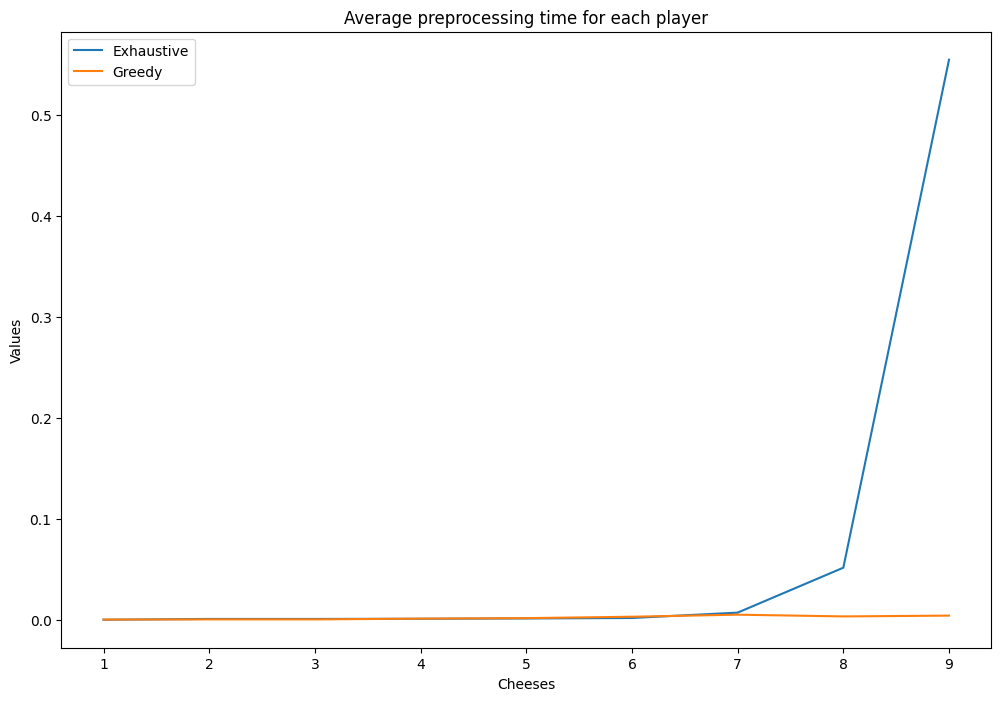

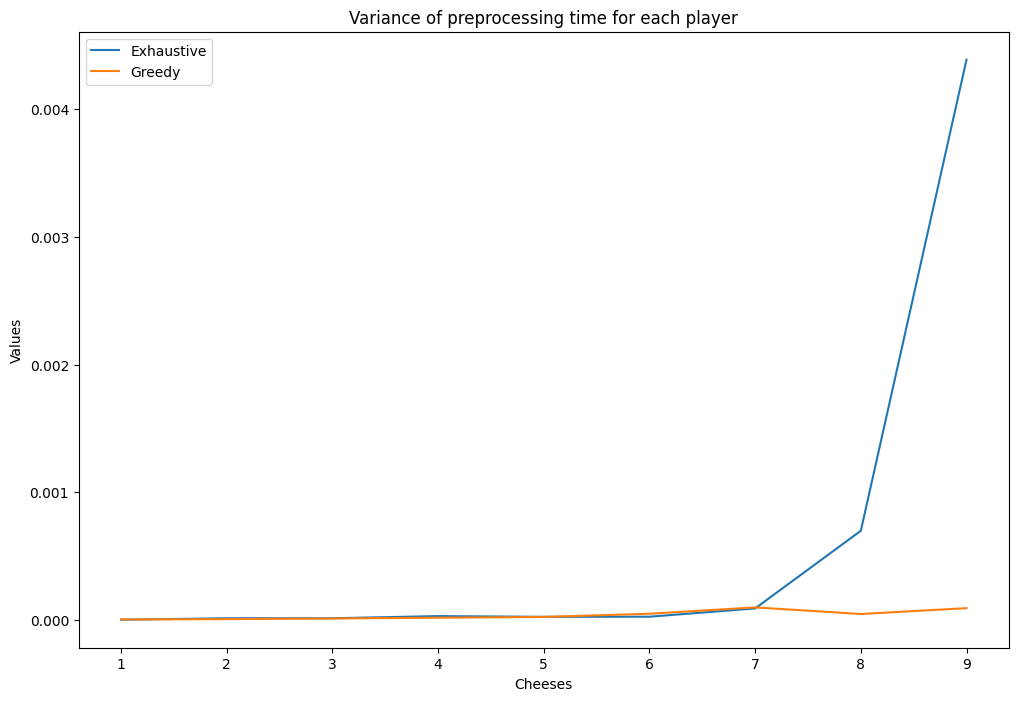

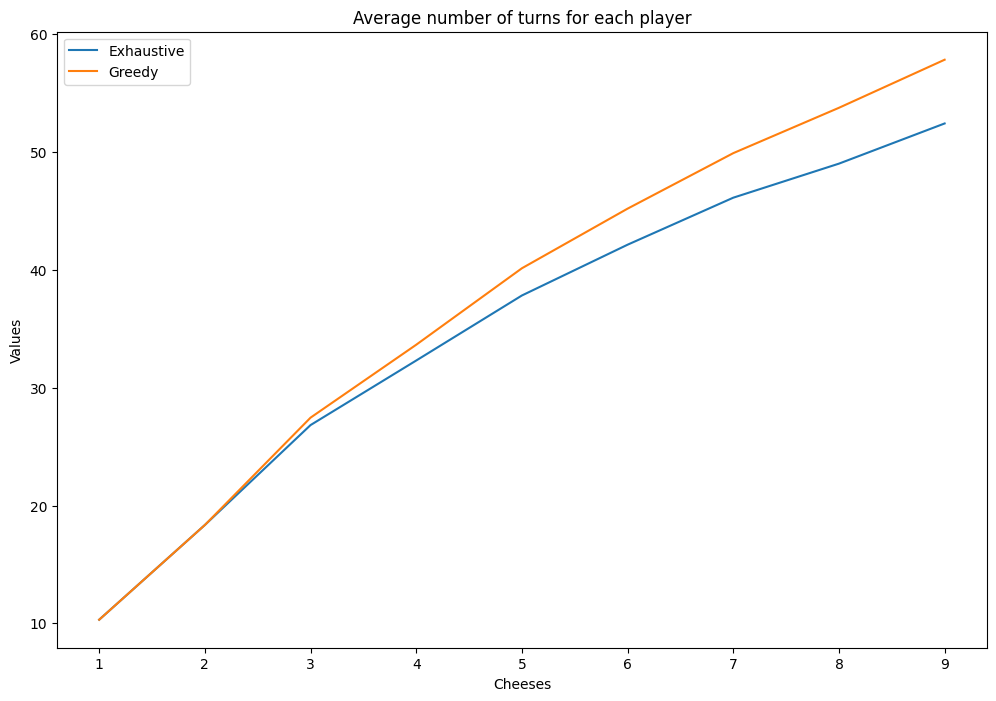

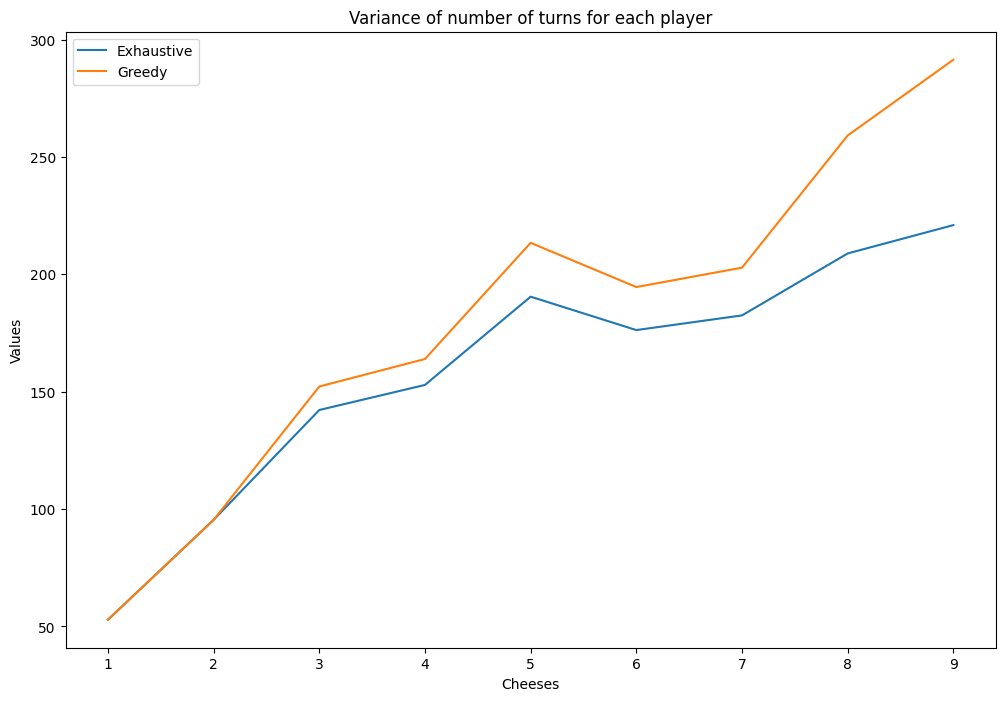

In [5]:
### Average preprocessing time for each player ###
# set width of bar 
barWidth = 0.2
fig, ax = plt.subplots(figsize =(12, 8)) 

print(type(prepro))

for key in players:
    prepro_ave_joueur = [statistics.mean(prepro[key][i]) for i in range(nb_cheese_max)]
    plt.plot(list(range(1,nb_cheese_max + 1)), prepro_ave_joueur, label = key)



ax.set_xlabel('Cheeses') 
ax.set_ylabel('Values') 
plt.title('Average preprocessing time for each player')
plt.legend()
plt.show()

### Variance of preprocessing time for each player ###
# set width of bar
barWidth = 0.2
fig, ax = plt.subplots(figsize =(12, 8)) 

for key in players:
    prepro_var_joueur = [statistics.variance(prepro[key][i]) for i in range(nb_cheese_max)]
    plt.plot(list(range(1,nb_cheese_max + 1)), prepro_var_joueur, label = key)

# Adding Xticks
ax.set_xlabel('Cheeses')
ax.set_ylabel('Values')
plt.title('Variance of preprocessing time for each player')
plt.legend()
plt.show()

### Average number of turns for each player ###
# set width of bar
barWidth = 0.2
fig, ax = plt.subplots(figsize =(12, 8))

for key in players:
    turns_ave_joueur = [statistics.mean(turns[key][i]) for i in range(nb_cheese_max)]
    plt.plot(list(range(1,nb_cheese_max + 1)), turns_ave_joueur, label = key)

# Adding Xticks
ax.set_xlabel('Cheeses')
ax.set_ylabel('Values')
plt.title('Average number of turns for each player')
plt.legend()
plt.show()

### Variance of number of turns for each player ###
# set width of bar
barWidth = 0.2
fig, ax = plt.subplots(figsize =(12, 8))

for key in players:
    turns_var_joueur = [statistics.variance(turns[key][i]) for i in range(nb_cheese_max)]
    plt.plot(list(range(1,nb_cheese_max + 1)), turns_var_joueur, label = key)

# Adding Xticks
ax.set_xlabel('Cheeses')
ax.set_ylabel('Values')
plt.title('Variance of number of turns for each player')
plt.legend()
plt.show()